In [31]:
import datetime

In [33]:
from datetime import datetime

In [2]:
# Proper DataGeneration Algorithm
import random
from collections import defaultdict
import numpy as np
import pandas as pd

current_amount=1245000

transaction_dataset=[]

for year in range(2022,2023):
  for month in range(1,13):
    if year==2022:
      a=29
    else:
      a=30
    for day in range(1,a):
      # transaction date
      date=str(year)+"-"+str(month)+"-"+str(day)
      # per day many transactions can be done
      for t in range(2,random.randint(4,8)):
        # generate transaction made
        transAmt=np.random.uniform(1, 1000)

        # Choose amount is going to be deposited or credited
        credOrDebt=random.choice(['Credit','Debit'])

        inc_src='None'
        if credOrDebt=='Credit':
          current_amount+=transAmt

          # now if credit then choose income source
          inc_src=random.choice(['Salary', 'Investments', 'Business', 'Other'])

          # payment method type
          transMethod=random.choice(['Credit Card', 'Cash', 'UPI'])

          # merchants in case of amount credited
          merchant=random.choice(['Grocery Store','Clothing Boutique','Electronics Store','Restaurant','Gas Station','Travel Agency','Subscription Service','Utility Company','Healthcare Provider'])

          # transaction category
          transCat=random.choice(["Pension Plans","Social Security","Savings and Investments","Annuities","Consulting or Freelancing","Part-Time Work"])
        else:
          current_amount-=transAmt

          # payment method type
          transMethod= random.choice(["Debit Card","Checks","Mobile Payments","Online Banking","Prepaid Debit Cards"])

          # merchants in case of maount debited
          merchant=random.choice([ "Coffee Shop","Bookstore","Taxi Service","Gym Membership","ATM Withdrawal","Rent Payment","Car Repair Shop","Local Farmers' Market",])

          # transcation category
          transCat=random.choice(["Taxes",
"Insurance",
"Entertainment and Leisure",
"Debt Payments",
"Personal Care",
"Charitable Donations",
"Miscellaneous Expenses"])

        # transaction location
        loc=random.choice(['solapur','mumbai','delhi','pune','satara','nagpur','thane'])

        # create a final record
        record={'Transaction_Date':date,'Transaction_Amount':round(transAmt,2),"Transaction_Category":transCat,'Transaction_Type':transMethod,'Income_source':inc_src,'Merchant':merchant,'Location':loc,'Current_Amount':round(current_amount,2),'Credit/Debit':credOrDebt}

        # append the record
        transaction_dataset.append(record)

# convert the transaction dataset to dataframe
df=pd.DataFrame(transaction_dataset)


print(df.columns)
# df.head()

# save the dataFrame
df.to_csv('financial_dataset.csv', index=False)


Index(['Transaction_Date', 'Transaction_Amount', 'Transaction_Category',
       'Transaction_Type', 'Income_source', 'Merchant', 'Location',
       'Current_Amount', 'Credit/Debit'],
      dtype='object')


In [94]:
def correlation_analysis(data, x_col, y_col):
    correlation =x_col[:list(min(x_col.shape,y_col.shape))[0]], y_col
    return correlation

In [95]:
correlation_analysis(df, df[df["Credit/Debit"]=="Debit"]["Transaction_Amount"], df[df["Credit/Debit"]=="Credit"]["Transaction_Amount"])


(1       656.36
 6       386.77
 8       676.87
 9       686.98
 10      485.41
          ...  
 1323      3.84
 1324    483.15
 1325    300.39
 1327    561.28
 1330    258.67
 Name: Transaction_Amount, Length: 673, dtype: float64,
 0       853.24
 2        64.86
 3       569.90
 4       477.54
 5       836.56
          ...  
 1356    346.08
 1357    238.00
 1361    569.93
 1362    554.40
 1369    935.30
 Name: Transaction_Amount, Length: 673, dtype: float64)

In [38]:
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from statsmodels.tsa.arima.model import ARIMA
from numpy.random import default_rng



In [66]:
df['Transaction_Date'].shape

(1370,)

In [67]:
df[df["Credit/Debit"]=="Credit"]["Transaction_Amount"].shape

(673,)

In [69]:
trend_analysis(df[df["Credit/Debit"]=="Debit"]['Transaction_Date'],df[df["Credit/Debit"]=="Debit"]["Transaction_Amount"])

1.5410961307743974e-06

In [ ]:
df[df["Credit/Debit"]=="Credit"]["Transaction_Amount"]

,Transaction_Date,Transaction_Amount,Transaction_Category,Transaction_Type,Income_source,Merchant,Location,Current_Amount,Credit/Debit
3,2022-1-2,608.96,Social Security,Cash,Investments,Travel Agency,nagpur,1244211.60,Credit
4,2022-1-2,929.77,Part-Time Work,Cash,Business,Utility Company,delhi,1245141.37,Credit
5,2022-1-3,119.37,Part-Time Work,UPI,Investments,Healthcare Provider,nagpur,1245260.73,Credit
6,2022-1-3,415.59,Consulting or Freelancing,Cash,Other,Travel Agency,satara,1245676.32,Credit
7,2022-1-3,362.04,Annuities,UPI,Other,Gas Station,pune,1246038.36,Credit
...,...,...,...,...,...,...,...,...,...
1275,2022-12-24,4.41,Annuities,UPI,Investments,Clothing Boutique,solapur,1214704.15,Credit
1276,2022-12-25,336.10,Savings and Investments,UPI,Investments,Subscription Service,mumbai,1215040.25,Credit
1278,2022-12-26,271.13,Annuities,Cash,Business,Healthcare Provider,satara,1214974.69,Credit
1279,2022-12-26,331.12,Annuities,Credit Card,Salary,Grocery Store,satara,1215305.81,Credit


In [ ]:
df.columns


Index(['Transaction_Date', 'Transaction_Amount', 'Transaction_Category',
       'Transaction_Type', 'Income_source', 'Merchant', 'Location',
       'Current_Amount', 'Credit/Debit'],
      dtype='object')

In [ ]:
cr=df[df["Credit/Debit"]=="Credit"]
cr

,Transaction_Date,Transaction_Amount,Transaction_Category,Transaction_Type,Income_source,Merchant,Location,Current_Amount,Credit/Debit
0,2022-1-1,63.20,Pension Plans,UPI,Other,Restaurant,delhi,1245063.20,Credit
1,2022-1-1,809.87,Social Security,UPI,Other,Clothing Boutique,thane,1245873.07,Credit
5,2022-1-3,816.76,Part-Time Work,Credit Card,Salary,Gas Station,thane,1245768.34,Credit
7,2022-1-3,56.90,Pension Plans,Credit Card,Investments,Utility Company,delhi,1245549.09,Credit
8,2022-1-4,824.20,Part-Time Work,UPI,Business,Gas Station,satara,1246373.29,Credit
...,...,...,...,...,...,...,...,...,...
1304,2022-12-27,883.74,Annuities,Cash,Business,Clothing Boutique,satara,1236873.01,Credit
1305,2022-12-27,220.28,Savings and Investments,Credit Card,Investments,Utility Company,delhi,1237093.29,Credit
1306,2022-12-27,108.36,Savings and Investments,UPI,Investments,Restaurant,delhi,1237201.65,Credit
1310,2022-12-28,901.37,Social Security,Credit Card,Investments,Utility Company,satara,1236364.84,Credit


In [ ]:
df.head(20)

,Transaction_Date,Transaction_Amount,Transaction_Category,Transaction_Type,Income_source,Merchant,Location,Current_Amount,Credit/Debit
0,2022-1-1,510.53,Rent Payment,Online Banking,Other,Subscription Service,solapur,1245510.53,Credit
1,2022-1-1,847.27,Transportation,Prepaid Debit Cards,None,Local Farmers' Market,nagpur,1244663.26,Debit
2,2022-1-1,108.58,Local Farmers' Market,Prepaid Debit Cards,Investments,Gas Station,thane,1244771.85,Credit
3,2022-1-1,52.46,Automotive Expenses,Mobile Payments,None,Rent Payment,solapur,1244719.39,Debit
4,2022-1-1,740.12,Rent Payment,Mobile Payments,Other,Restaurant,mumbai,1245459.51,Credit
5,2022-1-1,562.11,Car Repair Shop,Mobile Payments,Other,Healthcare Provider,nagpur,1246021.62,Credit
6,2022-1-2,822.43,Local Farmers' Market,Mobile Payments,Investments,Utility Company,solapur,1246844.05,Credit
7,2022-1-2,220.08,Automotive Expenses,Debit Card,None,Bookstore,solapur,1246623.97,Debit
8,2022-1-2,127.67,Car Repair Shop,Debit Card,Salary,Travel Agency,mumbai,1246751.65,Credit
9,2022-1-3,976.71,Fitness and Recreation,Prepaid Debit Cards,None,Coffee Shop,pune,1245774.94,Debit


In [ ]:
df.columns

Index(['Transaction_Date', 'Transaction_Amount', 'Transaction_Category',
       'Transaction_Type', 'Income_source', 'Merchant', 'Location',
       'Current_Amount', 'Credit/Debit'],
      dtype='object')

In [ ]:
df.shape

(1310, 9)

In [ ]:
import pandas as pd
import numpy as np
import random
import string

# Set the number of records you want in the dataset
num_records = 1000

# Create an empty DataFrame to store the data
data = pd.DataFrame()

# Generate Transaction Date and Time
data['Transaction_Date'] = pd.date_range(start='2022-01-01', periods=num_records, freq='D')
# data['Transaction_Time'] = [random.choice(pd.date_range(start='00:00:00', end='23:59:59', freq='S').time()) for _ in range(num_records)]

# Generate Transaction Amount
data['Transaction_Amount'] = np.random.uniform(1, 1000, num_records)

# Generate Transaction Type
transaction_types = ['Deposit', 'Withdrawal', 'Purchase', 'Transfer']
data['Transaction_Type'] = [random.choice(transaction_types) for _ in range(num_records)]

# Generate Merchant or Vendor Information
merchants = ['Amazon', 'Walmart', 'Starbucks', 'Gas Station', 'Grocery Store']
data['Merchant'] = [random.choice(merchants) for _ in range(num_records)]

# Generate Location
data['Location'] = ['City ' + str(random.randint(1, 10)) for _ in range(num_records)]

# Generate Payment Method
payment_methods = ['Credit Card', 'Debit Card', 'Cash', 'UPI']
data['Payment_Method'] = [random.choice(payment_methods) for _ in range(num_records)]

# Generate Transaction Categories
transaction_categories = ['Groceries', 'Rent/Mortgage', 'Utilities', 'Entertainment', 'Dining']
data['Transaction_Category'] = [random.choice(transaction_categories) for _ in range(num_records)]

# Generate Account Balance Changes
data['Account_Balance_Change'] = np.random.uniform(-1000, 1000, num_records)

# Generate Customer Demographics
data['Age'] = np.random.randint(18, 70, num_records)
data['Gender'] = [random.choice(['Male', 'Female', 'Other']) for _ in range(num_records)]

# Generate Income Information
data['Income_Source'] = [random.choice(['Salary', 'Investments', 'Business', 'Other']) for _ in range(num_records)]

# Generate Transaction Notes (optional)
data['Transaction_Notes'] = [''.join(random.choices(string.ascii_letters, k=random.randint(10, 30))) for _ in range(num_records)]

# Generate Customer IDs
data['Customer_ID'] = [f'Customer_{i+1}' for i in range(num_records)]

# You can save the dataset to a CSV file
data.to_csv('financial_dataset.csv', index=False)


In [ ]:
data.columns

NameError: ignored

In [ ]:
unique_years=data['Transaction_Date'].dt.year.unique()
unique_years

array([2022, 2023, 2024])

In [3]:
# function that convert the dataset in terms of years to months for better analysis
import os


def datasetFormater(file):
  dataset=pd.read_csv(file)
  # create a directory to store the CSV files
  dataset_folder="/content/"
  os.makedirs(dataset_folder,exist_ok=True)

  # convert the transaction dat column to a datatiem object
  dataset['Transaction_Date'] = pd.to_datetime(dataset['Transaction_Date'], format='%Y-%m-%d')

  # split the date colums into months, years
  dataset['Year']=dataset['Transaction_Date'].dt.year
  dataset['Month']=dataset['Transaction_Date'].dt.month
  # group the data by year and month
  groupedByYearMonth=dataset.groupby([dataset['Year'],dataset['Month']])

  # create the data files that are grouped by month wise
  for (y,m),gr in groupedByYearMonth:
    # create directory for each data set
    year_directory=os.path.join(dataset_folder,str(y))
    os.makedirs(year_directory,exist_ok=True)

    month_csv_filename=os.path.join(year_directory,f'{m:02d}.csv')
    # drop the month columns Month and Year
    gr=gr.drop(columns=['Month','Year'],axis=1)
    gr.to_csv(month_csv_filename,index=False)

  print("All files generated...")


In [4]:
datasetFormater('/content/financial_dataset.csv')

All files generated...


In [ ]:
# conform the data splited is correct
testdf=pd.read_csv('/content/sample_data/Transaction_dataset/2022/04.csv')
print(testdf.shape)
testdf

In [ ]:
testdf.columns

Index(['Transaction_Date', 'Transaction_Amount', 'Transaction_Type',
       'Merchant', 'Location', 'Payment_Method', 'Transaction_Category',
       'Account_Balance_Change', 'Age', 'Gender', 'Income_Source',
       'Transaction_Notes', 'Customer_ID'],
      dtype='object')

In [ ]:
# List of analysis that pandas can do based on the dataset
"""
1] find the maximum transaction done in particular month
2] find the tax amount on each transaction
3] find the total number of transaction done in particular category
4] list of top 10 merchant, done many transactions
5] Maximum return is done by which income source
6] Retirees is in profit or in loss for the current month and by how much amount
7] Retirees total money transfer to each merchants
8]
9]
"""

Perform the listed task first on single month dataset

In [ ]:
# 1] find the maximum transaction done in particular month
idx=testdf['Transaction_Amount'].idxmax()
maxAmountRecord=testdf.iloc[idx]
dict(maxAmountRecord)

# now find the maximum amount transfer in each transaction type
maxLst=testdf[['Transaction_Amount','Transaction_Type']].groupby('Transaction_Type').max().reset_index()
maxLst=maxLst.rename(columns={'Transaction_Amount':"Max_Transaction_Amount"})
print(maxLst,maxLst.columns)



  Transaction_Type  Max_Transaction_Amount
0          Deposit              753.593541
1         Purchase              986.323345
2         Transfer              864.445475
3       Withdrawal              998.926733 Index(['Transaction_Type', 'Max_Transaction_Amount'], dtype='object')


In [ ]:
testdf['Transaction_Category'].unique()

array(['Groceries', 'Rent/Mortgage', 'Dining', 'Utilities',
       'Entertainment'], dtype=object)

In [ ]:
# 2] find the tax amount on each transaction
def getTaxAmount(record):
  if record['Transaction_Category']=='Utilities' or record['Transaction_Category']=='Rent/Mortgage':
    return 0.0
  else:
    county_sales_tax = float(record['Transaction_Amount']) * .025
    state_sales_tax = float(record['Transaction_Amount']) * .05
    total_sales_tax = county_sales_tax + state_sales_tax
    return total_sales_tax



In [ ]:
# taxAmount for each record
testdf['Transaction_Tax']=testdf.apply(lambda x: getTaxAmount(x),axis=1)
print(testdf.columns)
testdf[['Transaction_Amount','Transaction_Tax','Transaction_Category']].head(10)

In [ ]:
# 3] find the total number of transaction done in particular category
df1=testdf[['Transaction_Category','Transaction_Amount']].groupby('Transaction_Category').count().reset_index()
df1.columns
print(df1)
testdf.shape

  Transaction_Category  Transaction_Amount
0               Dining                   5
1        Entertainment                   6
2            Groceries                   9
3        Rent/Mortgage                   3
4            Utilities                   7


(30, 14)

In [ ]:
# 4] list of top 5 merchant, done many transactions

# df2=testdf[['Merchant','Transaction_Amount','Transaction_Type']].groupby(['Merchant','Transaction_Type']).count().reset_index()
df2=testdf[['Merchant','Transaction_Amount']].groupby(['Merchant']).count().reset_index()

df2=df2.rename(columns={'Transaction_Amount':'Count'})
df2.sort_values(by='Count',inplace=True,ascending=False)
df2.head()

,Merchant,Count
2,Grocery Store,9
3,Starbucks,8
4,Walmart,6
1,Gas Station,4
0,Amazon,3


In [ ]:
# Find the tax amount on each record
def getTaxAmount(record):
  if record['Transaction_Amount']

In [ ]:
# use of pandas to extract the necessary details on the monthly data
def autoAnalyzer(file):
  # read the file
  df=pd.read_csv(file)

  # Get the ma



In [ ]:
data.columns


Index(['Transaction_Date', 'Transaction_Amount', 'Transaction_Type',
       'Merchant', 'Location', 'Payment_Method', 'Transaction_Category',
       'Account_Balance_Change', 'Age', 'Gender', 'Income_Source',
       'Transaction_Notes', 'Customer_ID'],
      dtype='object')

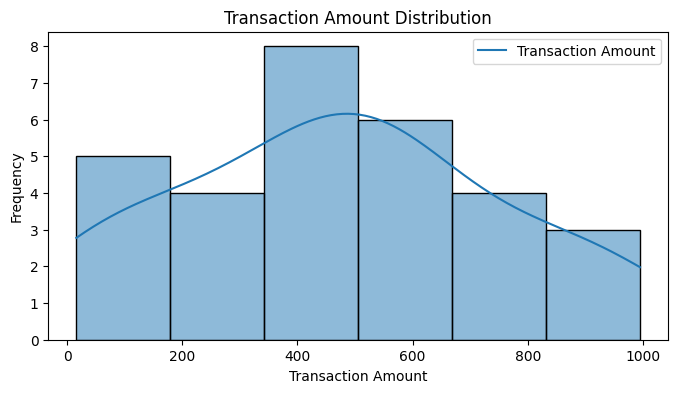

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis: Understand the distribution of transaction amounts.
plt.figure(figsize=(8, 4))
sns.histplot(testdf['Transaction_Amount'], kde=True)
plt.xlabel('Transaction Amount')
# plt.xlabel('Transaction_Category')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend(['Transaction Amount'])
plt.show()


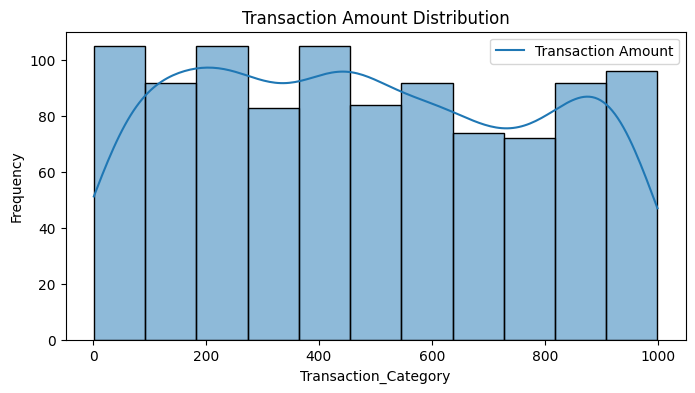

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis: Understand the distribution of transaction amounts.
plt.figure(figsize=(8, 4))
sns.histplot(data['Transaction_Amount'], kde=True)
plt.xlabel('Transaction Amount')
# plt.xlabel('Transaction_Category')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend(['Transaction Amount'])
plt.show()


"""
It will help to analyse the frequency of transactions of amount lying in the mentioned amount range
- for example:
 Rs. 0- 200
 i.e. a person had done 50 to 95 transaction of rupees in between 0 to 200

"""

In [ ]:
data.describe()

,Transaction_Amount,Account_Balance_Change,Age
count,1000.000000,1000.000000,1000.000000
mean,477.643197,6.089312,43.630000
std,287.326050,564.977500,14.937879
min,1.813236,-999.977488,18.000000
25%,229.306401,-464.013588,31.000000
50%,457.132183,9.355405,44.000000
75%,727.903079,490.516160,57.000000
max,998.231473,999.130060,69.000000


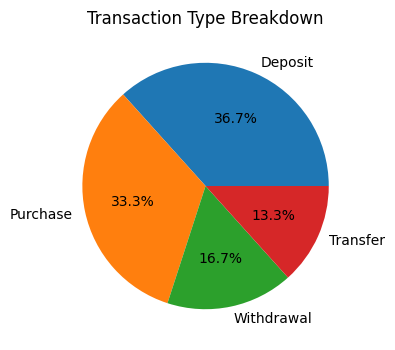

In [ ]:
# Analysis: Explore the proportion of different transaction types.
plt.figure(figsize=(4, 4))
# data['Transaction_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
testdf['Transaction_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Transaction Type Breakdown')
plt.ylabel('')
plt.show()


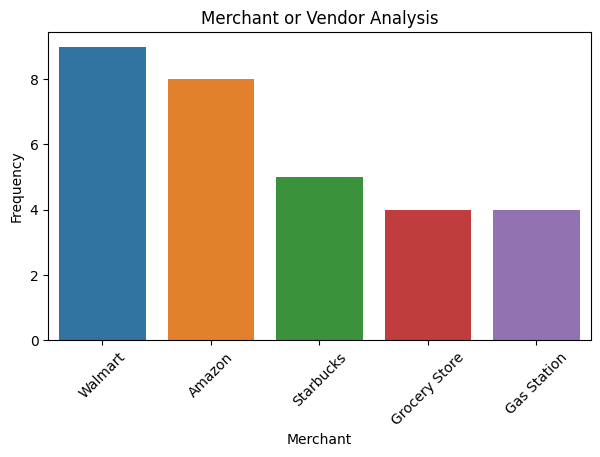

In [ ]:
# Analysis: Determine which merchants are most frequently used.
plt.figure(figsize=(7, 4))
# sns.countplot(data=data, x='Merchant', order=data['Merchant'].value_counts().index)
sns.countplot(data=testdf, x='Merchant', order=testdf['Merchant'].value_counts().index)

plt.xticks(rotation=45)
plt.xlabel('Merchant')
plt.ylabel('Frequency')
plt.title('Merchant or Vendor Analysis')
plt.show()


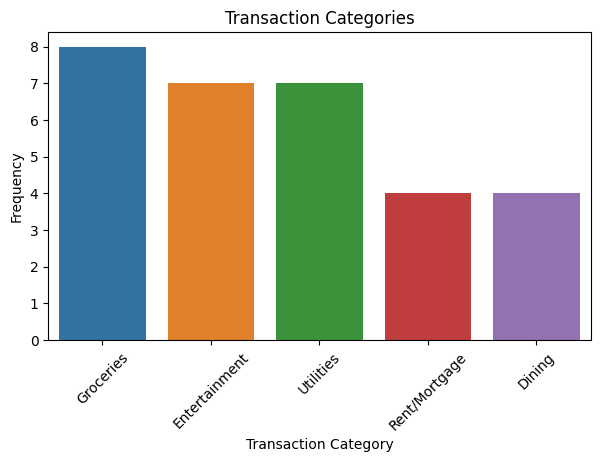

In [ ]:
# Analysis: Explore spending across different transaction categories.
plt.figure(figsize=(7, 4))
# sns.countplot(data=data, x='Transaction_Category', order=data['Transaction_Category'].value_counts().index)
sns.countplot(data=testdf, x='Transaction_Category', order=testdf['Transaction_Category'].value_counts().index)

plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Frequency')
plt.title('Transaction Categories')
plt.show()


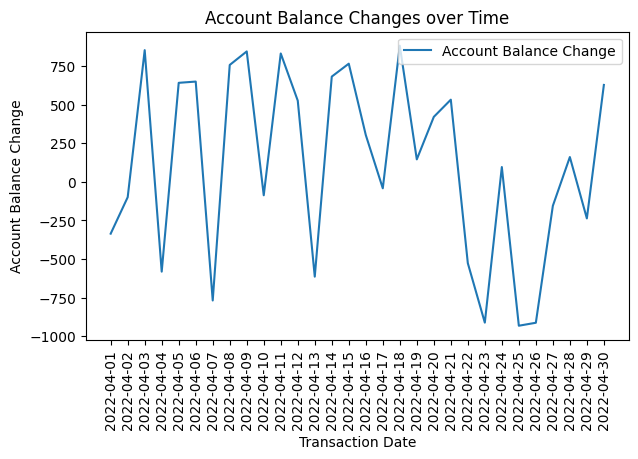

In [ ]:
# Analysis: Track changes in account balance over time.
plt.figure(figsize=(7, 4))
# plt.plot(data['Transaction_Date'], data['Account_Balance_Change'])
plt.plot(testdf['Transaction_Date'], testdf['Account_Balance_Change'])


plt.xticks(rotation=90)
plt.xlabel('Transaction Date')
plt.ylabel('Account Balance Change')
plt.title('Account Balance Changes over Time')
plt.legend(['Account Balance Change'],loc='upper right')
plt.show()


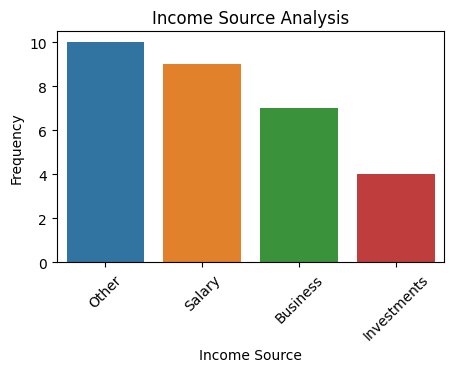

In [ ]:
# Analysis: Examine the sources of income for customers.
plt.figure(figsize=(5, 3))
# sns.countplot(data=data, x='Income_Source', order=data['Income_Source'].value_counts().index)
sns.countplot(data=testdf, x='Income_Source', order=testdf['Income_Source'].value_counts().index)

plt.xticks(rotation=45)
plt.xlabel('Income Source')
plt.ylabel('Frequency')
plt.title('Income Source Analysis')
plt.show()


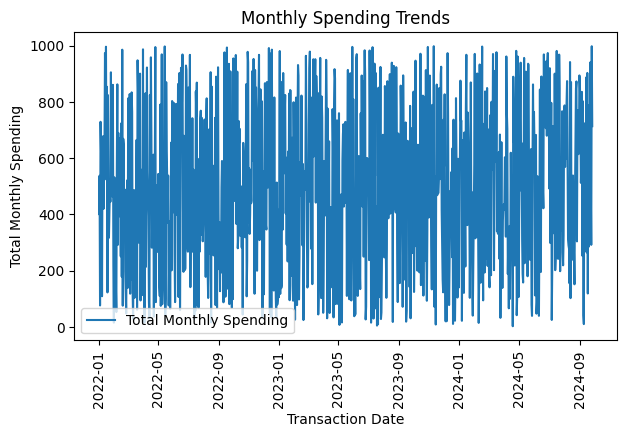

In [ ]:
# Analysis: Identify spending trends over months.
plt.figure(figsize=(7,4))
sns.lineplot(data=data, x='Transaction_Date', y='Transaction_Amount', estimator='sum')
# sns.lineplot(data=testdf, x='Transaction_Date', y='Transaction_Amount', estimator='sum')

plt.xlabel('Transaction Date')
plt.xticks(rotation=90)

plt.ylabel('Total Monthly Spending')
plt.title('Monthly Spending Trends')
plt.legend(['Total Monthly Spending'])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


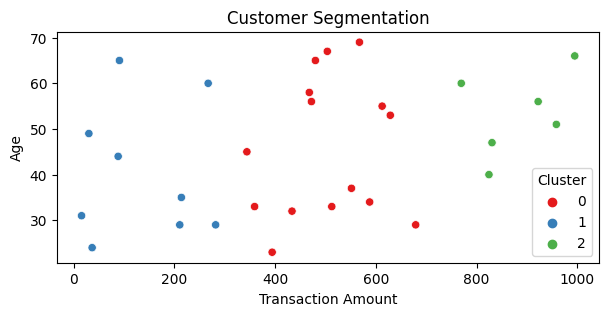

In [ ]:
# Analysis: Group customers into segments based on spending behavior.
from sklearn.cluster import KMeans

# Perform clustering, for example, with 3 clusters
kmeans = KMeans(n_clusters=3)
# data['Cluster'] = kmeans.fit_predict(data[['Transaction_Amount', 'Age']])
testdf['Cluster'] = kmeans.fit_predict(testdf[['Transaction_Amount', 'Age']])


plt.figure(figsize=(7, 3))
# sns.scatterplot(data=data, x='Transaction_Amount', y='Age', hue='Cluster', palette='Set1')
sns.scatterplot(data=testdf, x='Transaction_Amount', y='Age', hue='Cluster', palette='Set1')
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.title('Customer Segmentation')
plt.legend(title='Cluster')
plt.show()


In [ ]:
import plotly.express as px

# Assuming you have a DataFrame 'data' with columns 'Transaction_Date' and 'Transaction_Amount'
fig = px.line(data, x='Transaction_Date', y='Transaction_Amount', labels={'Transaction_Amount': 'Total Monthly Spending'})
fig.update_xaxes(title_text='Transaction Date')
fig.update_yaxes(title_text='Total Monthly Spending')
fig.update_layout(title='Monthly Spending Trends', legend_title='Legend')
fig.show()
